# <center> Project 1 

1. Problem Statement 
2. Important Libraries
3. data Gathering >> 


3. EDA
    >> Data Missing Value
    >> Correlations 
    >> Outliers
    >> Data Types
    >> Data Distribution 
    >> Insights 
    >> Nature 
    >> Reports 
    >> Stats 
    >> Hypothesis 
    
    
4. Feature Engg
    >>
5. feature selection
    >>
6. Model Building / Training 
    >>
7. Model Evaluate
    >>
8. Deployment 






### 1. Problem Statement 

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year,
around 15% of its employees leave the company and need to be replaced with the talent pool available in the
job market. The management believes that this level of attrition (employees leaving, either on their own or 
because they got fired) is bad for the company, because of the following reasons. -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation 
   loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves
   to the company

    
"""Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, 
in order to curb attrition. In other words, they want to know what changes they should make to their workplace,
in order to get most of their employees to stay. Also, they want to know which of these variables is most important 
and needs to be addressed right away."""


#### ♦ ♦ Goal of the case study ♦ ♦

You are required to model the probability of attrition using a logistic regression. The results thus obtained
will be used by the management to understand what changes they should make to their workplace,
in order to get most of their employees to stay.

### 2. DESCRIPTIVE STATISTICS
what we know

•we have 16% employees left last year.

• 60% employees are Male.

• Most employees are during 30~38 years old.

• employees that left are generally younger than employees stay.

• The top relative features to attrition is 
  MaritalStatus,EnvironmentSatisfaction,JobSatisfaction,YearsAtCompany,YearsWithCurrManager,Age,TotalWorkingYears
  
• people who left have pretty low jobsatisfaction,whereas enviroments satisfaction varies.
  Noticed that there is relatively low ralation between leaving and performanceRating or jobinvolvements.
  
• Single empolyees are more likely to leave.

# -----------------------------------------------------------------------------------------------------------

### 1.1  Important Libraries

In [1]:
#___________________________________________________________________________________________________________

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


#___________________________________________________________________________________________________________

### 2. Data Gathering

In [2]:
#___________________________________________________________________________________________________________

df=pd.read_csv(r'final_data.csv')
df

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,6,1,0,0,3,3,6.87,3.0,4.0,2.0
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,3,5,1,4,2,4,7.30,3.0,2.0,4.0
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,2,5,0,3,3,3,6.80,2.0,2.0,1.0
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,5,8,7,5,2,3,6.78,4.0,4.0,3.0
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,2,6,0,4,3,3,7.87,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,...,5,3,0,2,3,3,8.32,4.0,1.0,3.0
4406,4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,...,2,3,0,2,2,3,5.88,4.0,4.0,3.0
4407,4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,...,4,4,1,2,3,4,7.13,1.0,3.0,3.0
4408,4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,...,2,9,7,8,2,3,9.18,4.0,1.0,3.0


In [3]:
df.shape

(4410, 31)

In [4]:
#----------------------------------------------------------------------------------------------------------------

### 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   EmployeeID               4410 non-null   int64  
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

In [6]:
dtypes = pd.DataFrame(df.dtypes, columns=['Type'])
dtypes['Unique'] = df.nunique()
dtypes['Null'] = df.isnull().sum()
dtypes

,Type,Unique,Null
Unnamed: 0,int64,4410,0
Age,int64,43,0
Attrition,object,2,0
BusinessTravel,object,3,0
Department,object,3,0
DistanceFromHome,int64,29,0
Education,int64,5,0
EducationField,object,6,0
EmployeeCount,int64,1,0
EmployeeID,int64,4410,0


In [7]:
df.describe()

,Unnamed: 0,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,2204.500000,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,...,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,7.306050,2.723603,2.728246,2.761436
std,1273.201673,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,...,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.330865,1.092756,1.101253,0.706245
min,0.000000,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.420000,1.000000,1.000000,1.000000
25%,1102.250000,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,6.270000,2.000000,2.000000,2.000000
50%,2204.500000,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,7.000000,3.000000,3.000000,3.000000
75%,3306.750000,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,7.900000,4.000000,4.000000,3.000000
max,4409.000000,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,10.930000,4.000000,4.000000,4.000000


 ♦ ♦findingthe percentage of null values

In [8]:
df.isna().sum()/ df.shape[0] * 100

Unnamed: 0                 0.000000
Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.430839
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.204082
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
JobInvolvement             0.000000
PerformanceRating          0.000000
mean_time                  0

### 4. Feature Engineering

♦ ♦ here we remov the irrelevant column

In [9]:

df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeID', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
print(df.shape)

(4410, 26)


♦ ♦ Null Values are fill with median where the 

In [10]:
df['JobSatisfaction'].fillna(df['JobSatisfaction'].median(),axis=0,inplace=True)
df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median(),axis=0,inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean(),axis=0,inplace=True)
df['NumCompaniesWorked'].fillna(0,axis=0,inplace=True)
df['TotalWorkingYears'].fillna(0,axis=0,inplace=True)

## Encoding
♦ ♦ In the dataset there are 6 categorical data columns, so we have to change them into Numerical data by using encoding . Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

♦ One-Hot Encoding
In this approach, for each category of a feature, we create a new  dummy column with binary encoding (0 or 1) to denote whether a particular row belongs to this category. 

♦ Label Encoding
In label encoding in Python, we replace the categorical value with a numeric value between 0 and the
number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).


In [11]:
df['Attrition']= pd.get_dummies(df['Attrition'])
df['BusinessTravel']= pd.get_dummies(df['BusinessTravel'])
df['Department'] = pd.get_dummies(df['Department'])
df['EducationField'] = pd.get_dummies(df['EducationField'])
df['Gender'] = pd.get_dummies(df['Gender'])
df['JobRole'] = pd.get_dummies(df['JobRole'])
df['MaritalStatus'] = pd.get_dummies(df['MaritalStatus'])

In [12]:
df.isna().sum()/ df.shape[0] * 100

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
Gender                     0.0
JobLevel                   0.0
JobRole                    0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
StockOptionLevel           0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
JobInvolvement             0.0
PerformanceRating          0.0
mean_time                  0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
WorkLifeBalance            0.0
dtype: float64

♦ ♦ check relationship between attrition and other features.

In [13]:

df.corr()['Attrition'].sort_values().to_frame()

,Attrition
mean_time,-0.199008
EducationField,-0.091573
Department,-0.080768
NumCompaniesWorked,-0.041503
PercentSalaryHike,-0.032533
PerformanceRating,-0.023403
StockOptionLevel,0.006839
DistanceFromHome,0.009730
JobLevel,0.010290
JobRole,0.013768


### 3.1 Data Visualisation 

<AxesSubplot:xlabel='Age', ylabel='count'>

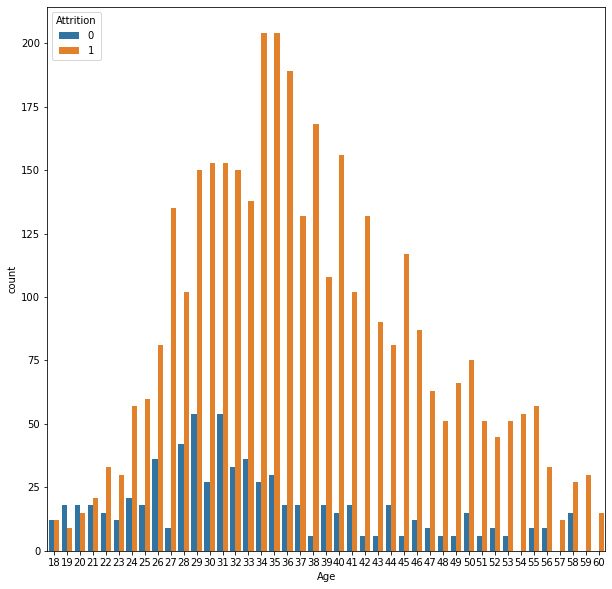

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age', hue='Attrition',data=df)

1) with age, employee attrition is decreasing

2) majority of employees having age between 20-30 are leaving maybe in search of some better jobs

3) more than 50% of attrition is seen in age group 10-20 but this is not a problem because 
very few employees are there in this age group and most of them would be intern only

<AxesSubplot:xlabel='Attrition', ylabel='count'>

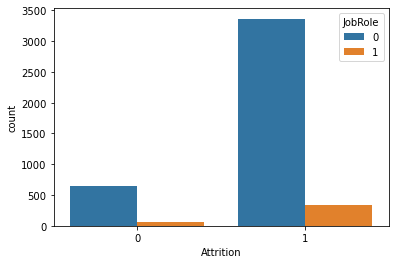

In [15]:
sns.countplot(x='Attrition', hue='JobRole',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

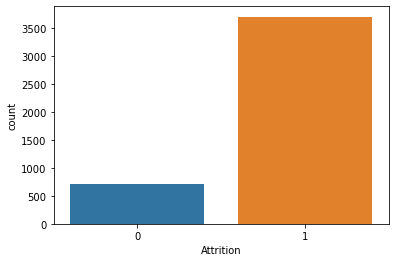

In [16]:
sns.countplot(x='Attrition',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

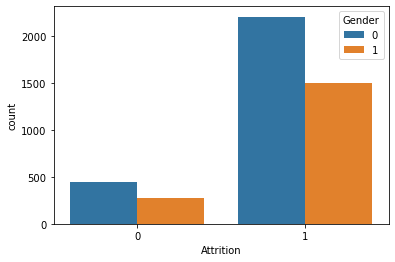

In [17]:
sns.countplot(x='Attrition', hue='Gender',data=df)

In [18]:
#-----------------------------------------------------------------------------

### 3.2  Outliers Analysis

<AxesSubplot:>

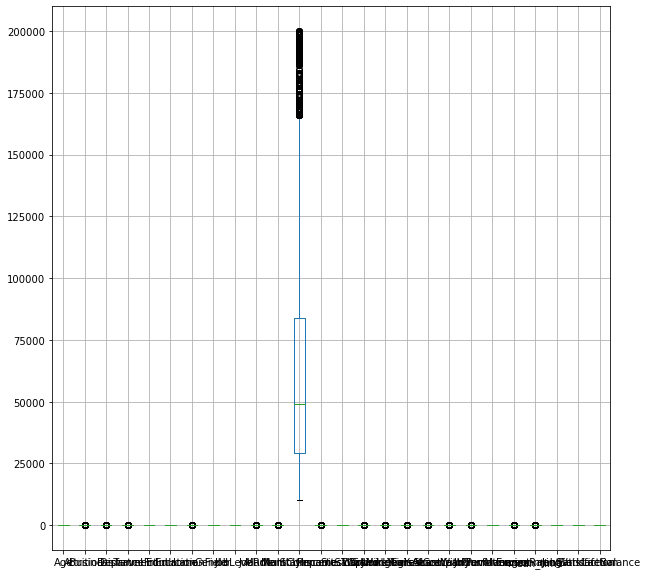

In [19]:
plt.figure(figsize=(10,10))
df.boxplot()

In [20]:
#------------------------------------------------------------------------------

### 3.3. Data Correlation

### ◘ Correlation Table

In [21]:
#------------------------------------------------------------------------------
df.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Age,1.000000,0.159205,-0.011215,-0.007062,0.006963,-0.035706,-0.047678,0.039352,-0.002884,-0.051511,...,-0.027308,0.311309,0.216513,0.202089,0.018196,-0.025563,-0.000354,0.009699,-0.003003,-0.021191
Attrition,0.159205,1.000000,0.074457,-0.080768,0.009730,0.015111,-0.091573,0.018125,0.010290,0.013768,...,0.049431,0.134392,0.033019,0.156199,0.015588,-0.023403,-0.199008,0.101625,0.103068,0.062561
BusinessTravel,-0.011215,0.074457,1.000000,-0.038044,-0.026310,-0.006451,-0.029375,-0.041286,-0.041820,-0.010785,...,0.055976,0.007623,0.020815,0.016716,-0.017344,0.024540,-0.047947,0.002525,0.018227,0.005498
Department,-0.007062,-0.080768,-0.038044,1.000000,-0.024506,0.014716,0.646436,-0.008227,0.039373,-0.030820,...,-0.029598,-0.045801,-0.033187,-0.051562,0.004789,-0.006385,0.008049,0.019462,-0.009039,-0.009793
DistanceFromHome,0.006963,0.009730,-0.026310,-0.024506,1.000000,-0.008638,0.030508,0.044173,-0.037329,-0.016564,...,-0.009001,0.031684,0.002290,0.021584,-0.001837,0.036418,0.009955,0.020113,-0.011213,0.007961
Education,-0.035706,0.015111,-0.006451,0.014716,-0.008638,1.000000,-0.018057,0.016547,0.045746,-0.013044,...,0.010472,0.006080,0.022490,0.005358,-0.018279,-0.035591,0.001375,-0.045636,-0.004612,-0.006388
EducationField,-0.047678,-0.091573,-0.029375,0.646436,0.030508,-0.018057,1.000000,-0.028956,0.010409,-0.025003,...,-0.025872,-0.049815,-0.042572,-0.065796,-0.019288,-0.016167,0.046625,0.020551,-0.021652,0.010385
Gender,0.039352,0.018125,-0.041286,-0.008227,0.044173,0.016547,-0.028956,1.000000,0.026854,0.002924,...,0.030167,0.017277,0.021812,-0.004438,-0.025768,-0.051586,-0.003180,0.023277,-0.015923,0.032577
JobLevel,-0.002884,0.010290,-0.041820,0.039373,-0.037329,0.045746,0.010409,0.026854,1.000000,0.007818,...,-0.032500,-0.064219,-0.060811,-0.055251,-0.012630,-0.002474,0.010973,-0.024540,-0.018596,-0.027538
JobRole,-0.051511,0.013768,-0.010785,-0.030820,-0.016564,-0.013044,-0.025003,0.002924,0.007818,1.000000,...,-0.023548,-0.024588,-0.012301,-0.014144,0.021412,0.025550,-0.006506,0.036524,-0.001221,-0.022542


#------------------------------------------------------------------------------


### ◘ Heatmap Correlation 

<AxesSubplot:>

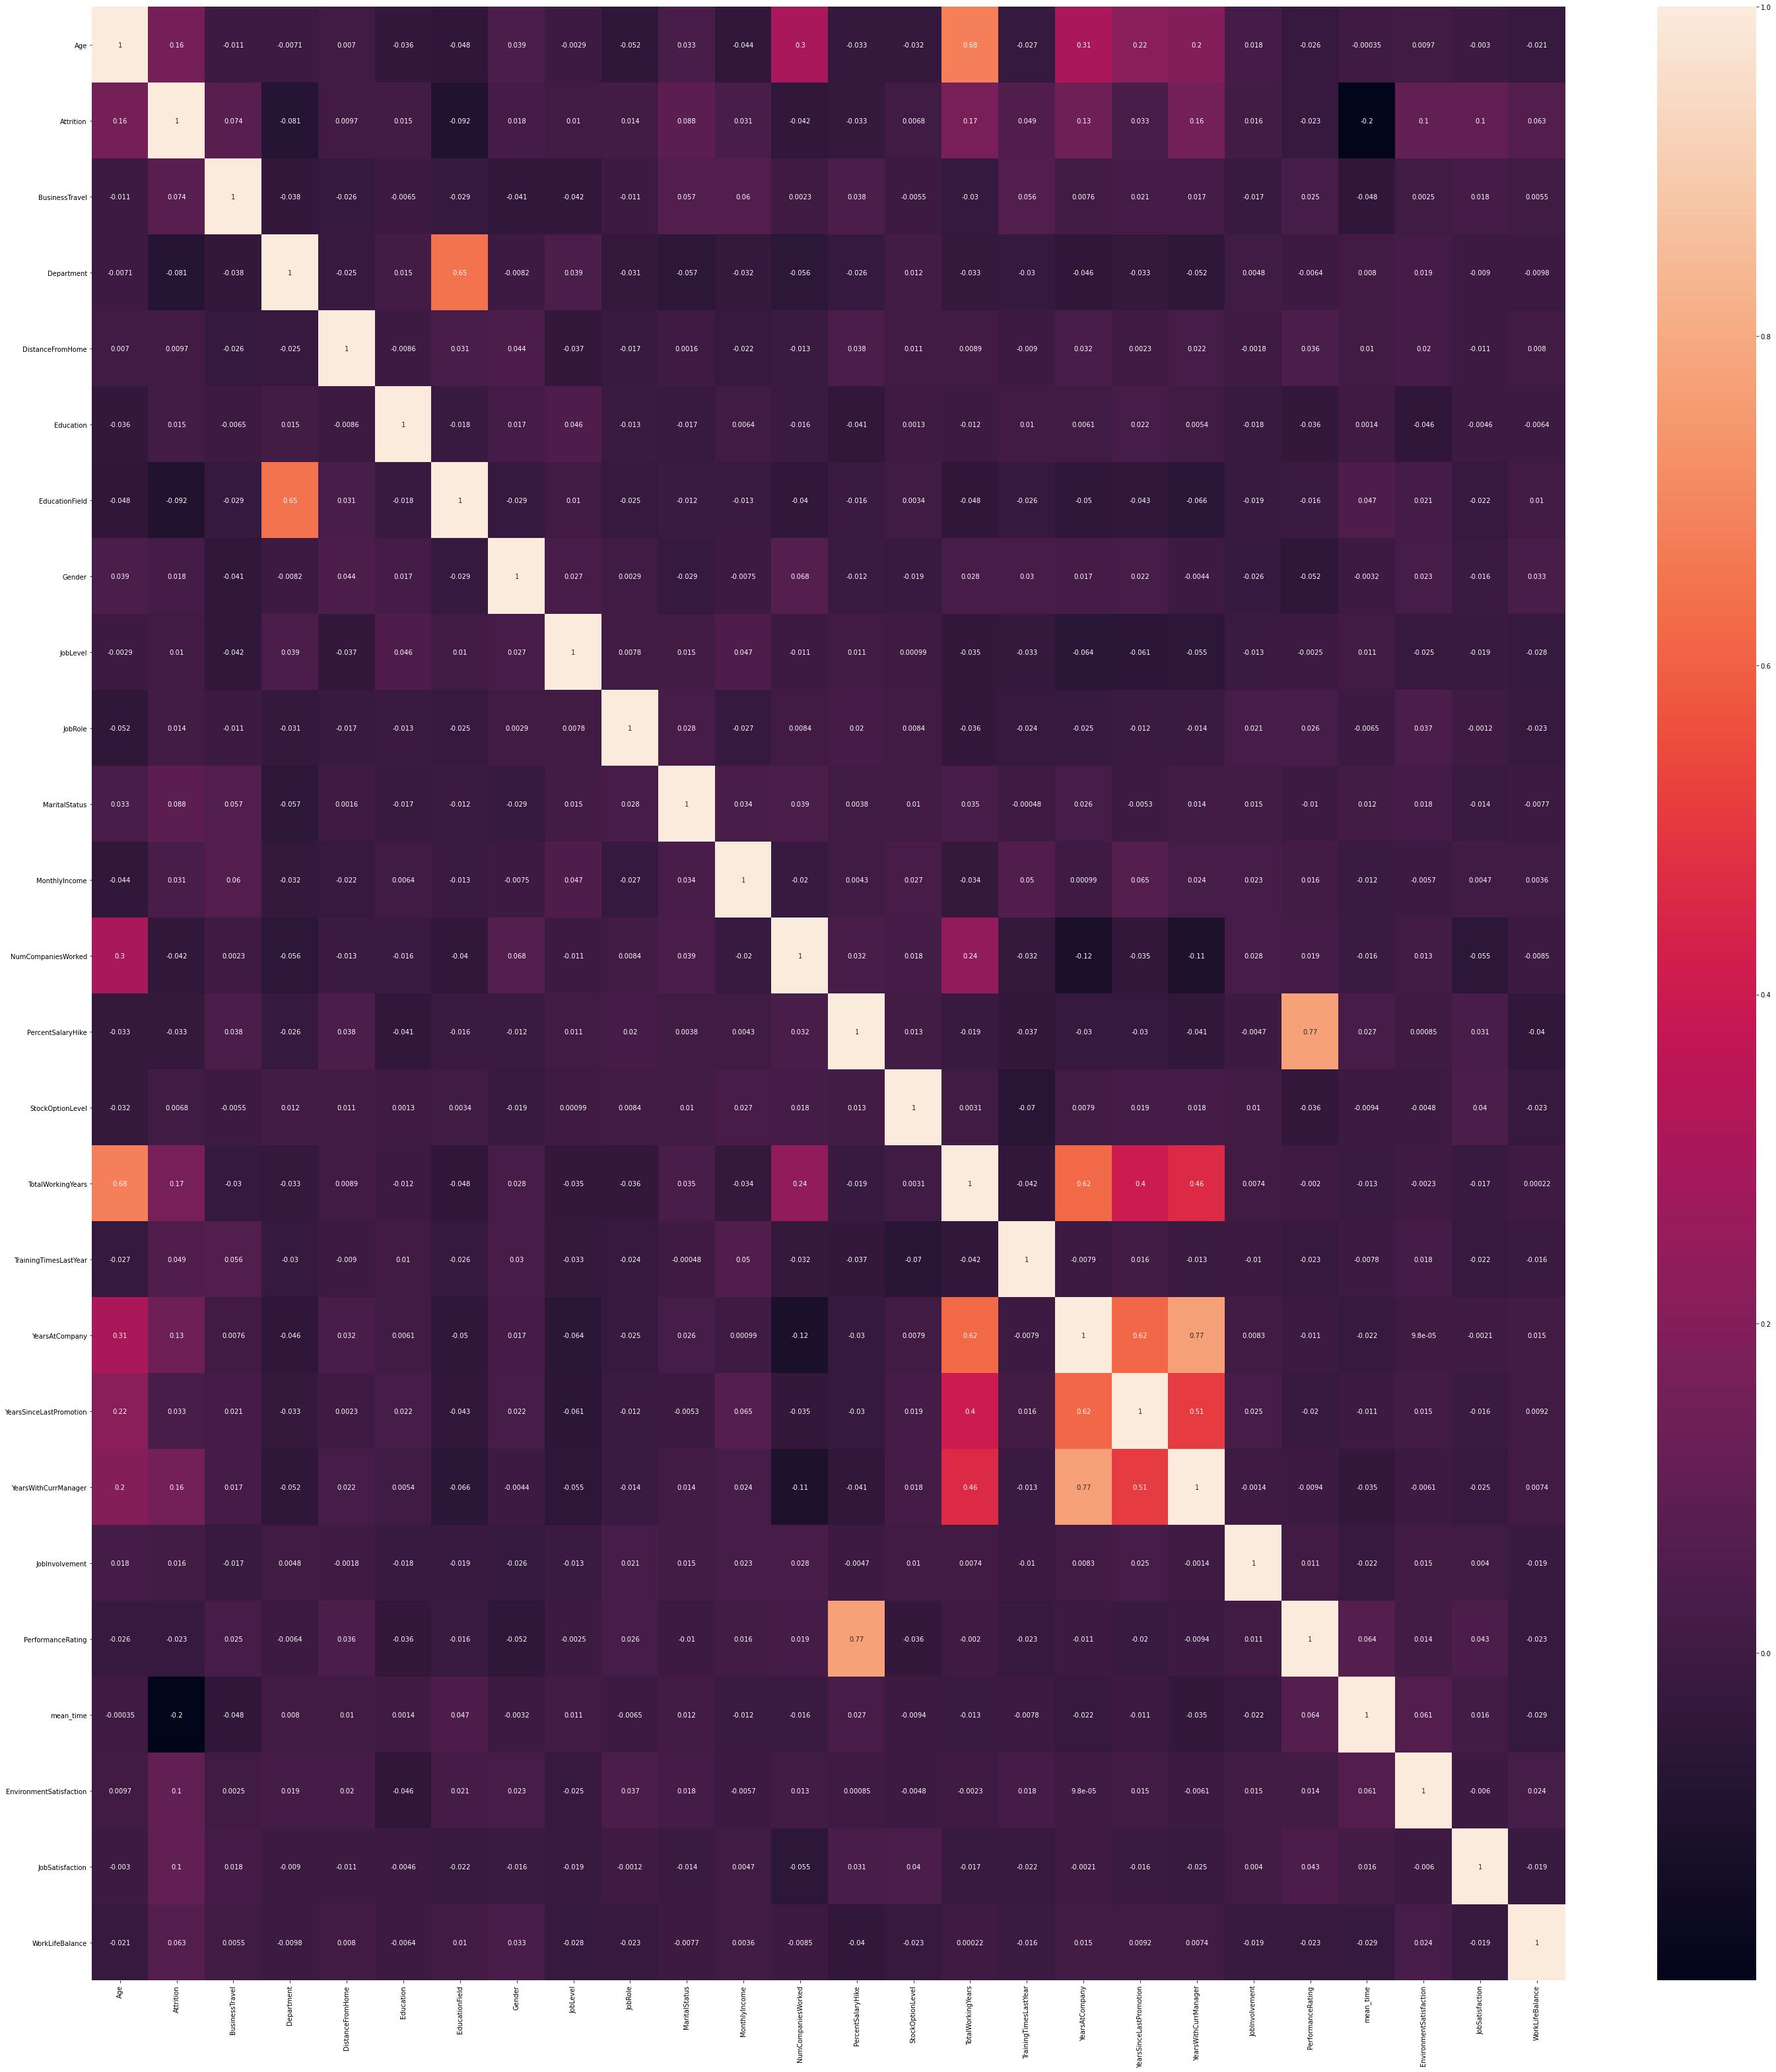

In [22]:
plt.figure(figsize=(50,55))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.value_counts('Attrition')

Attrition
1    3699
0     711
dtype: int64

In [24]:
#---------------------------------------------------------------------------------

# 5. Splitting the dataset

In [25]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [26]:
x.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [27]:
y=y.astype('int64')
y

0       1
1       0
2       1
3       1
4       1
       ..
4405    1
4406    1
4407    1
4408    1
4409    1
Name: Attrition, Length: 4410, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

##  Model Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier 

from sklearn.naive_bayes import GaussianNB 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.linear_model import LogisticRegression 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.neural_network import MLPClassifier 

from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, RandomizedSearchCV 

from sklearn import preprocessing 

from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, mean_squared_error 

 

In [30]:
def get_scores(score1, score2):
    models = []
    #models.append(('LR LogisticRegression', LogisticRegression()))
    #models.append(('LDA LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
    models.append(('KNN KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
    #models.append(('NB GaussianNB', GaussianNB()))
    models.append(('SVM ', SVC()))
    models.append(('ADA AdaBoostClassifier', AdaBoostClassifier()))
    models.append(('GradientBooster GradientBoostingClassifier', GradientBoostingClassifier()))
    models.append(('ExtraTrees ExtraTreesClassifier', ExtraTreesClassifier()))
    models.append(('RandomForest RandomForestClassifier', RandomForestClassifier()))
    cv_scores = []
    test_scores = []
    names = []
    stds = []
    differences = []
    #res = pd.DataFrame(columns = {'Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference'})
    #res = res[['Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference']]
    res = pd.DataFrame()
    for index, model in enumerate(models):
        kfold = StratifiedKFold(n_splits=7)
        cv_results = cross_val_score(model[1], x_train, y_train, cv=kfold, scoring=score1)
        cv_scores.append(cv_results)
        names.append(model[0])
        model[1].fit(x_train,y_train)
        predictions = model[1].predict(x_test)
        test_score = score2(predictions, y_test)
        test_scores.append(test_score)
        stds.append(cv_results.std())
        differences.append((cv_results.mean() - test_score))
        res.loc[index,'Model'] = model[0]
        res.loc[index,score1+('(train)')] = cv_results.mean()
        res.loc[index,score1+('(test_score)')] = test_score
        res.loc[index,'Std'] = cv_results.std()
        res.loc[index,'difference'] = cv_results.mean() - test_score
        
    return res

In [31]:
accuracy_table=get_scores('accuracy', accuracy_score)
accuracy_table

,Model,accuracy(train),accuracy(test_score),Std,difference
0,KNN KNeighborsClassifier,0.821769,0.770393,0.011962,0.051377
1,Decision Tree Classifier,0.954642,0.966767,0.009402,-0.012126
2,SVM,0.844451,0.806647,0.000745,0.037804
3,ADA AdaBoostClassifier,0.870327,0.841390,0.009135,0.028937
4,GradientBooster GradientBoostingClassifier,0.898075,0.871601,0.005884,0.026473
5,ExtraTrees ExtraTreesClassifier,0.989595,0.990937,0.004449,-0.001341
6,RandomForest RandomForestClassifier,0.984790,0.980363,0.004837,0.004427


### 6. Model Building 

### 6. 1.1 KNN CLASSIFIER MODEL

In [32]:
knn_model=KNeighborsClassifier(n_neighbors=15,p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [33]:
y_pred=knn_model.predict(x_test)

In [34]:
#----------------------------------------------------------------------------------------------

###  6.1.2. Confusion Matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 14, 114],
       [ 18, 516]], dtype=int64)

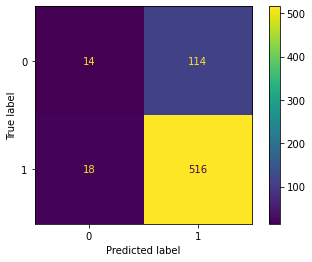

In [36]:
plot_confusion_matrix(knn_model,x_test,y_test)

#### ♦  Accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.8006042296072508

####  ♦ classification report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.11      0.17       128
           1       0.82      0.97      0.89       534

    accuracy                           0.80       662
   macro avg       0.63      0.54      0.53       662
weighted avg       0.75      0.80      0.75       662



In [39]:
#-------------------------------------------------------------------------------

## 6.1.3. Hyper Parameter Tuning

Their are two types off Hyper parameter Tunning
• Grid Search CV
• Randomized Search Cv

In [40]:
#------------------------------------------------------------------------------------------------------------------

## 6.1.4 Grid Search CV

In [41]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
gscv_model= GridSearchCV(knn_model,hyperparamters,cv=2)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=15, p=1),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [42]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1)

In [43]:
gscv_model.best_params_

{'n_neighbors': 11, 'p': 1}

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=11,p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [45]:
y_pred1=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred1)

array([[ 15, 113],
       [ 22, 512]], dtype=int64)

In [46]:
y_pred1=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred1)

array([[ 15, 113],
       [ 22, 512]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred1)

0.7960725075528701

In [48]:
#-----------------------------------------------------------------------------------------------------------------

### 6.1.5  Randomized Search Cv

In [49]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=10)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=11, p=1),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'p': [1, 2]})

In [50]:
rscv_model.best_params_

{'p': 1, 'n_neighbors': 2}

In [51]:
knn_model=KNeighborsClassifier(n_neighbors=2,p=7)
knn_model.fit(x_train,y_train)
y_pred2=knn_model.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9577039274924471

In [52]:
y_pred2=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred2)

array([[122,   6],
       [ 22, 512]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred2)

0.9577039274924471

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.11      0.17       128
           1       0.82      0.97      0.89       534

    accuracy                           0.80       662
   macro avg       0.63      0.54      0.53       662
weighted avg       0.75      0.80      0.75       662



# -----------------------------------------------------------------------------------------------------------

## Conclusion :-

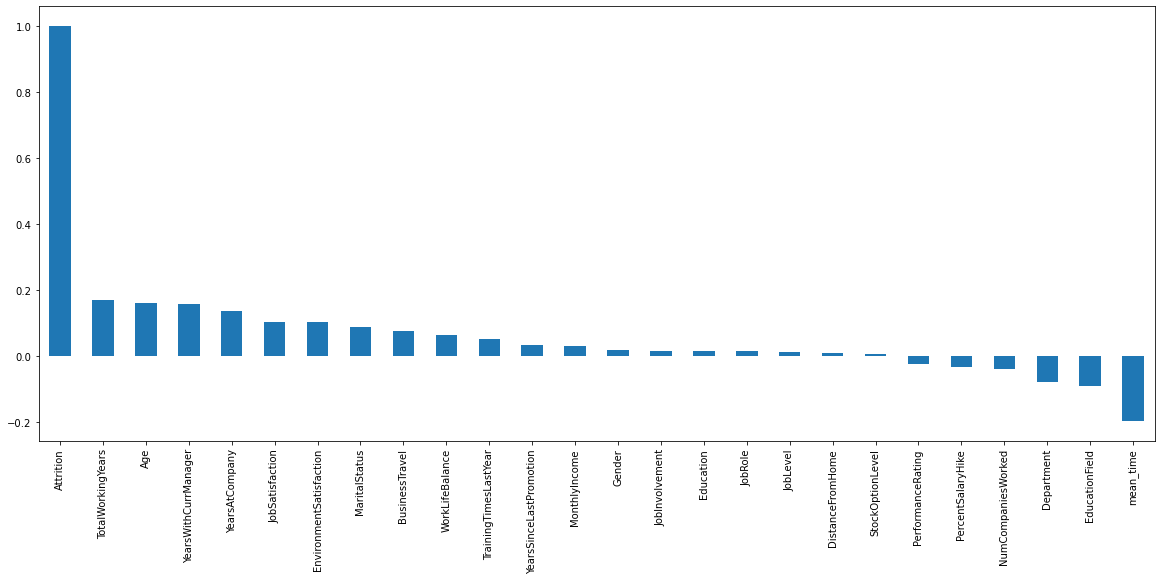

In [55]:
plt.figure(figsize=(20,8))
df.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [56]:
df.corr()['Attrition'].sort_values().to_frame()

,Attrition
mean_time,-0.199008
EducationField,-0.091573
Department,-0.080768
NumCompaniesWorked,-0.041503
PercentSalaryHike,-0.032533
PerformanceRating,-0.023403
StockOptionLevel,0.006839
DistanceFromHome,0.009730
JobLevel,0.010290
JobRole,0.013768


# Recommendations

Work-Life and Environment Company should take some actions to improve work life balance. Young people can be attracted to nice environments. Employees should take regular breaks (indoor activities).
Travelers For frequently traveling employees, company give them a promotion or a reward to keep them in job.
Managers Managers should not change regularly.